In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

In [3]:
plt.style.use('ggplot')

In [8]:
df = pd.read_csv("superstore_final_dataset (1).csv", encoding='latin1')



In [9]:
print(df.head())

   Row_ID        Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
0       1  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156   8/11/2017  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688   12/6/2017  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966  11/10/2016  18/10/2016  Standard Class    SO-20335   

     Customer_Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   
4    Sean O Donnel   Consumer  United States  Fort Lauderdale     Florida   

   Postal_Code Region       Product_ID         Cat

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64


In [12]:
df.dropna(inplace=True)

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:

print("Summary statistics:\n", df.describe())
print("Unique values per column:\n", df.nunique())


Summary statistics:
             Row_ID   Postal_Code         Sales
count  9789.000000   9789.000000   9789.000000
mean   4896.705588  55273.322403    230.116193
std    2827.486899  32041.223413    625.302079
min       1.000000   1040.000000      0.444000
25%    2449.000000  23223.000000     17.248000
50%    4896.000000  58103.000000     54.384000
75%    7344.000000  90008.000000    210.392000
max    9800.000000  99301.000000  22638.480000
Unique values per column:
 Row_ID           9789
Order_ID         4916
Order_Date       1229
Ship_Date        1326
Ship_Mode           4
Customer_ID       793
Customer_Name     793
Segment             3
Country             1
City              529
State              48
Postal_Code       626
Region              4
Product_ID       1860
Category            3
Sub_Category       17
Product_Name     1848
Sales            5750
dtype: int64


In [16]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

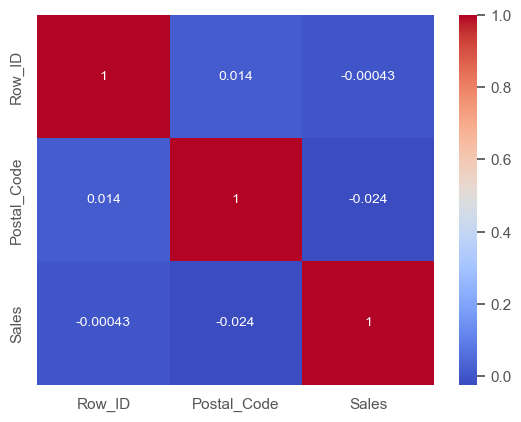

In [17]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

Text(0.5, 1.0, 'Correlation Matrix')

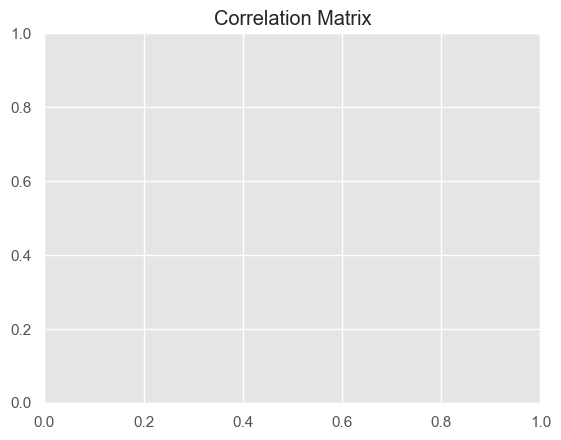

In [18]:
plt.title("Correlation Matrix")

In [19]:
plt.show()

In [20]:
region_sales = df.groupby('Region')['Sales'].sum().sort_values()

<Axes: title={'center': 'Total Sales by Region'}, ylabel='Region'>

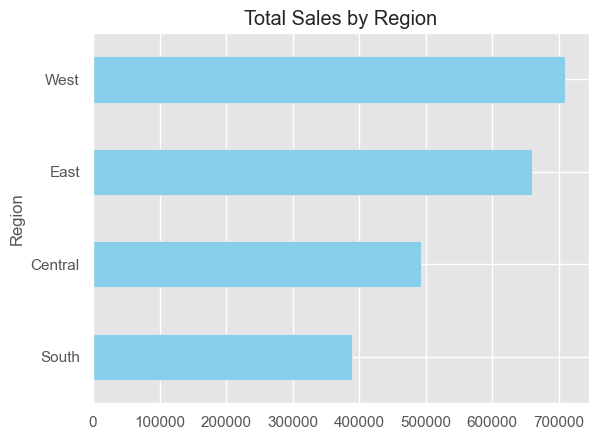

In [21]:
region_sales.plot(kind='barh', title="Total Sales by Region", color='skyblue')

Text(0.5, 0, 'Sales')

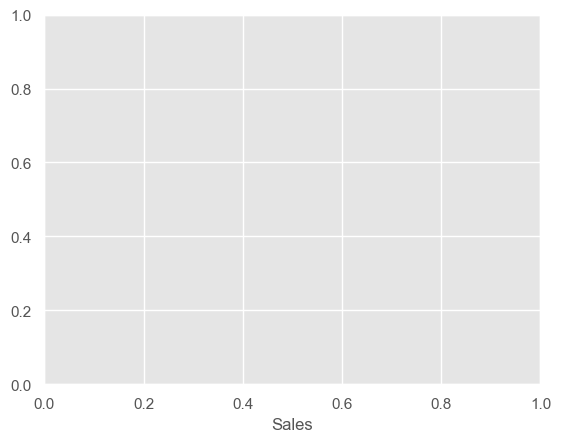

In [22]:
plt.xlabel("Sales")

In [23]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [24]:
plt.show()

In [25]:
top_categories = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)
print(top_categories)


Category
Technology         825856.1130
Furniture          723538.4757
Office Supplies    703212.8240
Name: Sales, dtype: float64


In [27]:
plt.figure(figsize=(8, 6))


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [29]:
print(df.columns.tolist())


['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Postal_Code', 'Region', 'Product_ID', 'Category', 'Sub_Category', 'Product_Name', 'Sales']


In [39]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst=True)


C:\Users\roina\AppData\Local\Temp\ipykernel_8856\3267539820.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order_Date').resample('M')['Sales'].sum().plot()


<Axes: xlabel='Order_Date'>

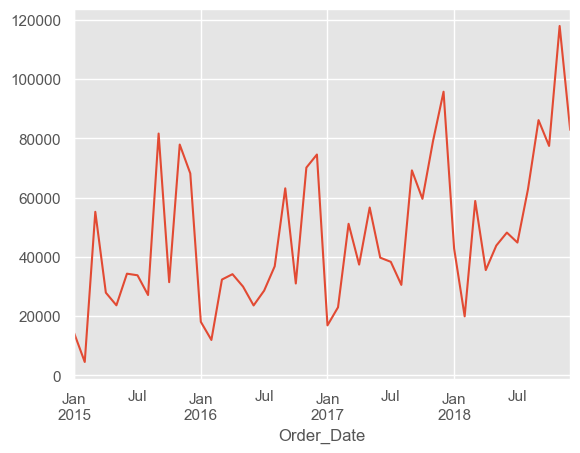

In [40]:
df.set_index('Order_Date').resample('M')['Sales'].sum().plot()

Text(0.5, 1.0, 'Monthly Sales Trend')

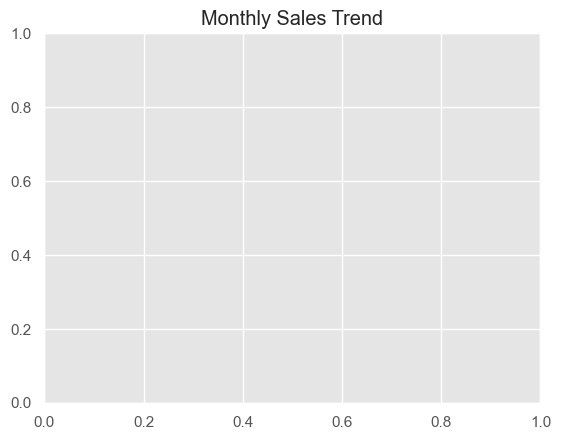

In [41]:
plt.title("Monthly Sales Trend")

Text(0, 0.5, 'Sales')

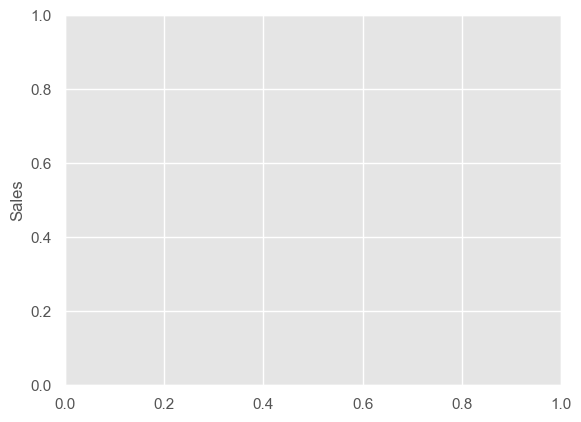

In [42]:
plt.ylabel("Sales")

Text(0.5, 0, 'Date')

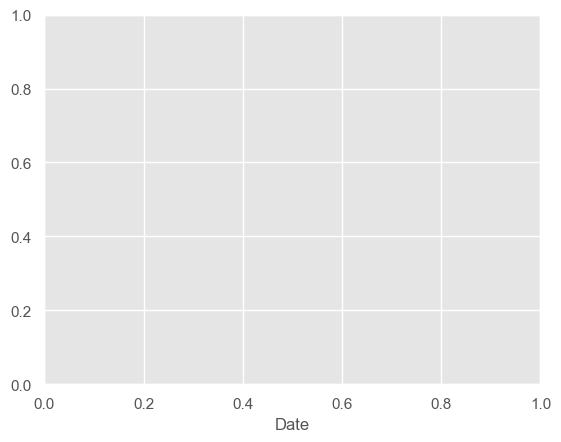

In [43]:
plt.xlabel("Date")

In [44]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [45]:
plt.show()

In [48]:
df['Profit'] = df['Sales'] * 0.2  # Example: assume a 20% margin


In [49]:
category_metrics = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

<Axes: title={'center': 'Sales vs Profit by Category'}, xlabel='Category'>

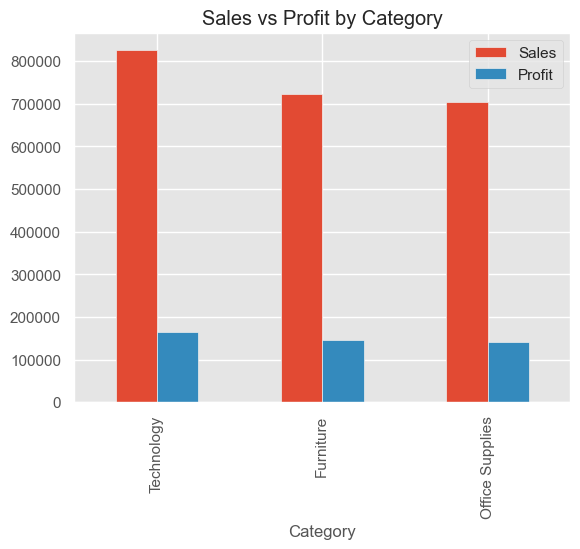

In [50]:
category_metrics.plot(kind='bar', title='Sales vs Profit by Category')

Text(0, 0.5, 'Amount')

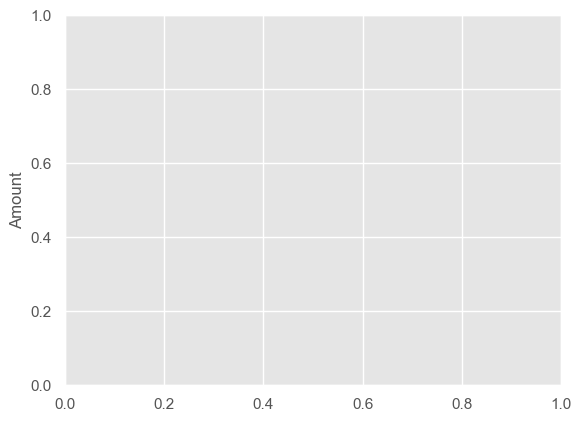

In [51]:
plt.ylabel("Amount")

In [52]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [53]:
plt.show()

In [54]:
category_sales = df.groupby('Category')['Sales'].sum().sort_values()

<Axes: title={'center': 'Sales by Category'}, ylabel='Category'>

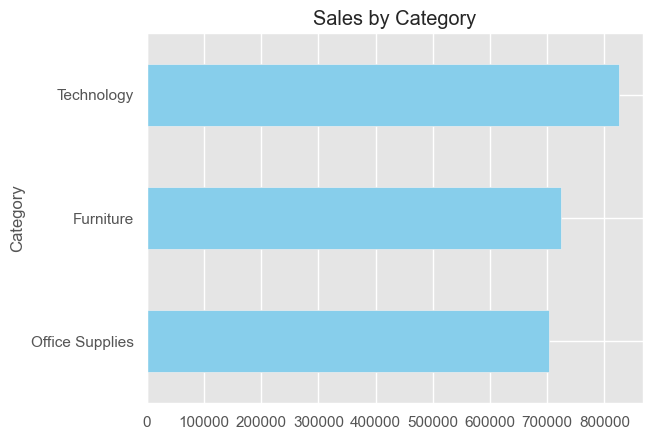

In [55]:
category_sales.plot(kind='barh', title="Sales by Category", color='skyblue')

Text(0.5, 0, 'Total Sales')

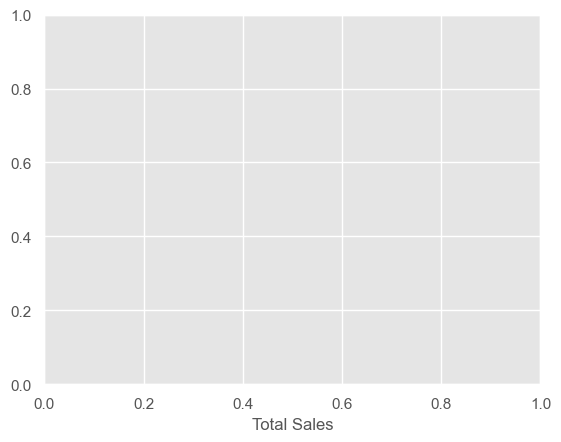

In [56]:
plt.xlabel("Total Sales")

In [57]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [58]:
plt.show()

In [59]:

top_customers = df.groupby('Customer_Id')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers)


Customer_Id
SM-20320    25043.050
TC-20980    19052.218
RB-19360    15117.339
TA-21385    14595.620
AB-10105    14473.571
KL-16645    14175.229
SC-20095    14142.334
HL-15040    12873.298
SE-20110    12209.438
CC-12370    12129.072
Name: Sales, dtype: float64


In [60]:
top_customers_named = df.groupby(['Customer_Id', 'Customer_Name'])['Sales'].sum().sort_values(ascending=False).head(10)
print(top_customers_named)


Customer_Id  Customer_Name     
SM-20320     Sean Miller           25043.050
TC-20980     Tamara Chand          19052.218
RB-19360     Raymond Buch          15117.339
TA-21385     Tom Ashbrook          14595.620
AB-10105     Adrian Barton         14473.571
KL-16645     Ken Lonsdale          14175.229
SC-20095     Sanjit Chand          14142.334
HL-15040     Hunter Lopez          12873.298
SE-20110     Sanjit Engle          12209.438
CC-12370     Christopher Conant    12129.072
Name: Sales, dtype: float64


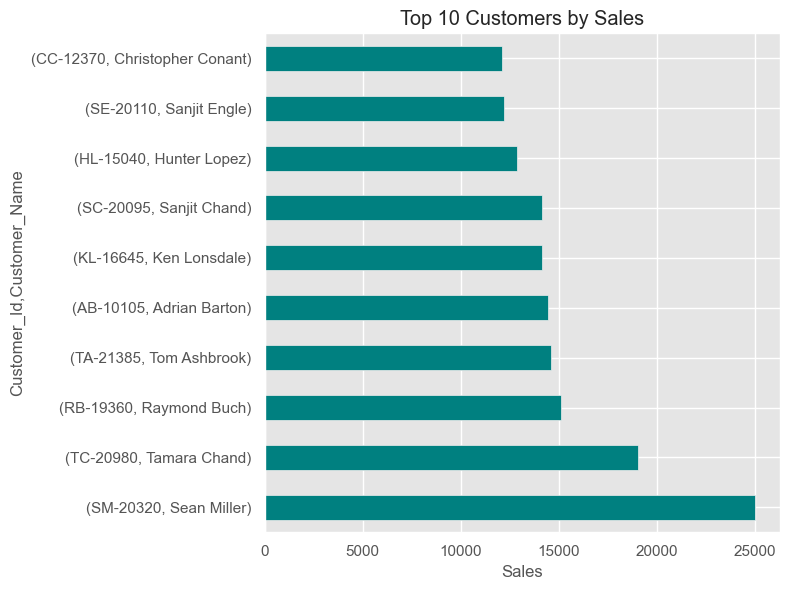

In [61]:
top_customers_named.plot(kind='barh', figsize=(8,6), color='teal')
plt.title("Top 10 Customers by Sales")
plt.xlabel("Sales")
plt.tight_layout()
plt.show()


In [62]:
customer_orders = df.groupby('Customer_Id')['Order_Id'].nunique().sort_values(ascending=False).head(10)
print(customer_orders)


Customer_Id
EP-13915    17
CK-12205    13
ZC-21910    13
JE-15745    13
PG-18820    13
HG-14965    12
CL-12565    12
DK-12835    12
SJ-20125    12
NS-18640    12
Name: Order_Id, dtype: int64
